In [1]:
import pandas as pd
import numpy as np

from ipynb.fs.defs.cluster_functions import mean_movs_by_hour
from ipynb.fs.defs.cluster_functions import scale_data
from ipynb.fs.defs.cluster_functions import n_clusters
from ipynb.fs.defs.cluster_functions import agrupar
from ipynb.fs.defs.cluster_functions import see_groups

In [2]:
import warnings
warnings.simplefilter(action='ignore')

In [3]:
df = pd.read_csv('valenbisi_mov.csv')

In [4]:
entre_semana = df.loc[((df['Weekday'] == 'Mon') |
                      (df['Weekday'] == 'Tue') |
                      (df['Weekday'] == 'Wed') |
                      (df['Weekday'] == 'Thu') |
                      (df['Weekday'] == 'Fri')) & (df['Is_holiday'] == False)]

fin_semana_festivos = df.loc[~((df['Weekday'] == 'Mon') |
                      (df['Weekday'] == 'Tue') |
                      (df['Weekday'] == 'Wed') |
                      (df['Weekday'] == 'Thu') |
                      (df['Weekday'] == 'Fri')) | (df['Is_holiday'] == True)]

### Clustering para días entre semana no festivos

Separaremos el dataframe en las siguientes franjas horarias:

1. MADRUGADA: de 00 a 6 am
2. MAÑANA: de 6 a 12 am
3. MEDIODÍA: de 12 a 16 
4. TARDE: de 16 a 22
5. NOCHE: de 21 a 00

In [5]:
entre_semana_madrugada = entre_semana.loc[(entre_semana['Hour'] >= 0) &
                                         (entre_semana['Hour'] < 7)]

entre_semana_madrugada['Period'] = 'MADRUGADA'

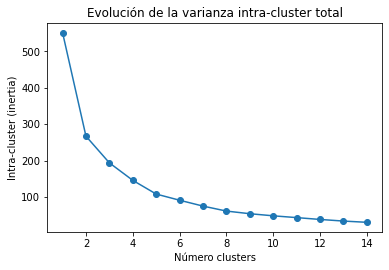

In [6]:
entre_semana_madrugada = mean_movs_by_hour(entre_semana_madrugada)
data = scale_data(entre_semana_madrugada)
n_clusters(data)

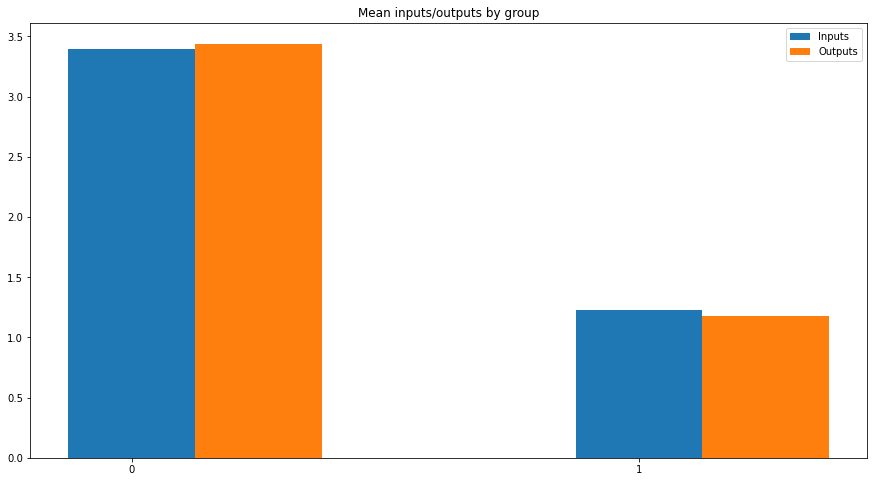

In [7]:
groups, means = see_groups(2, data, entre_semana_madrugada)

In [18]:
cat = []

for i in groups.index:
    g = groups['Group'][i]
    inp = round(means['Inputs'][g])
    oup = round(means['Outputs'][g])

    cat.append((inp, oup))
    
entre_semana_madrugada['Group'] = cat

In [19]:
total_inputs = sum(entre_semana_madrugada['Inputs'])
total_outputs = sum(entre_semana_madrugada['Outputs'])

In [20]:
persona_1_1 = round(means['Outputs'][1]/total_outputs, 3)

persona_3_3 = round(means['Outputs'][0]/total_outputs, 3)

bici_1_1 = round(means['Inputs'][1]/total_inputs, 3)

bici_3_3 = round(means['Inputs'][0]/total_inputs, 3)


probs_persona = []
probs_bici = []

for i in entre_semana_madrugada.index:
    if entre_semana_madrugada['Group'][i] == (1, 1):
        probs_persona.append(persona_1_1)
        probs_bici.append(bici_1_1)
    
    else:
        probs_persona.append(persona_3_3)
        probs_bici.append(bici_3_3)
        
entre_semana_madrugada['People_prob'] = probs_persona
entre_semana_madrugada['Bike_prob'] = probs_bici

In [22]:
entre_semana_madrugada.head()

,Id_station,Period,Inputs,Outputs,Group,People_prob,Bike_prob
0,1,MADRUGADA,1.659091,1.954545,"(1, 1)",0.002,0.002
1,2,MADRUGADA,1.102273,3.000000,"(1, 1)",0.002,0.002
2,3,MADRUGADA,2.113636,5.784091,"(3, 3)",0.007,0.007
3,4,MADRUGADA,2.386364,3.920455,"(3, 3)",0.007,0.007
4,5,MADRUGADA,1.079545,2.250000,"(1, 1)",0.002,0.002
